<h1 align="center"> Multiple Correspondence Analysis (MCA) for Data Visualization </h1>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import prince
%matplotlib inline

## Load Dataset

In [2]:
path = "./lsa_out/lsa_6_map.csv"
#url = "https://raw.githubusercontent.com/rachelbari/voynich-topic-modeling/master/out/nmf_4_map.csv"

In [3]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(path, index_col=0)
df = df.drop(['quire'], axis=1)

# Remove *Folio 57v* because it was labeled with an unknown language, topic and hand.
delete_row = df[df["folio"]=='f57v'].index
df = df.drop(delete_row)
df

,folio,topic,hand,language,topic_nmf
0,f1r,botanical,1,a,1
1,f1v,botanical,1,a,5
2,f2r,botanical,1,a,1
3,f2v,botanical,1,a,1
4,f3r,botanical,1,a,5
...,...,...,...,...,...
220,f114r,starred paragraphs,3,b,2
221,f114v,starred paragraphs,3,b,4
222,f115r,starred paragraphs,2,b,4
223,f115v,starred paragraphs,3,b,4


In [4]:
df.set_index('folio', inplace=True)

In [5]:
df.columns = ['topic', 'hand', 'language', 'lsa_topic']

In [6]:
df

,topic,hand,language,lsa_topic
folio,,,,
f1r,botanical,1,a,1
f1v,botanical,1,a,5
f2r,botanical,1,a,1
f2v,botanical,1,a,1
f3r,botanical,1,a,5
...,...,...,...,...
f114r,starred paragraphs,3,b,2
f114v,starred paragraphs,3,b,4
f115r,starred paragraphs,2,b,4


In [7]:
mca = prince.MCA(n_components=2, n_iter=4, copy=True, check_input=True, engine='auto', random_state=42)
mca = mca.fit(df)

/usr/local/lib/python3.7/site-packages/prince/one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
/usr/local/lib/python3.7/site-packages/pandas/core/sparse/frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/use

/usr/local/lib/python3.7/site-packages/prince/one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
/usr/local/lib/python3.7/site-packages/pandas/core/sparse/frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/use

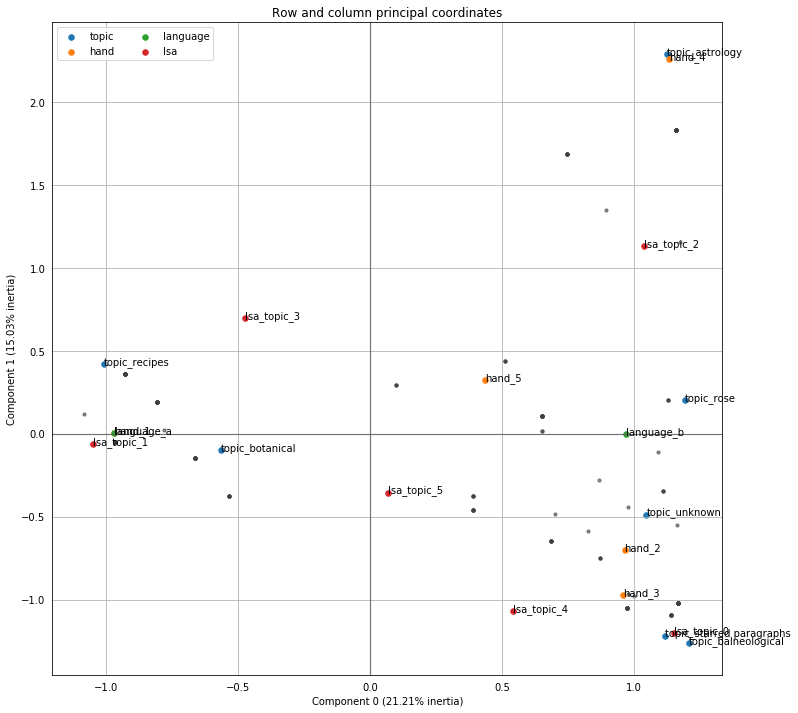

In [8]:
ax = mca.plot_coordinates(X=df, ax=None, figsize=(12, 12), show_row_points=True, row_points_size=10, show_row_labels=False,
                          show_column_points=True, column_points_size=30, show_column_labels=True, legend_n_cols=2)
#ax.get_figure()

We took out *Folio 57v* because it was labeled with an unknown language, topic and hand.